# Load Data

This file was included with the dataset and permitted initially to load the dataset and display one of each class.

It has been modified in order to train and test a Naive Bayesian model.

In [1]:
import glob, os 
from skimage import io, transform, filters, segmentation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.naive_bayes import GaussianNB, ComplementNB, BernoulliNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC, SVR
from skimage.color import rgb2gray

### Dataset path

In [2]:
path = "data/images/"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list, size=(300,180), flattened=False, grayScale=False, filt='none'):
    '''
    Function to create a dataset. It will load all the images into a np.array 
    
    Parameters: 
    
    - file_list: List of all the images you want to include in the dataset.
    - Size : Size of the images, by default is 180x300 which is the original size.
    - flattened: By default is False. Creates a dataset, but each image get converted into a big vector.
    
    Output: 
    
    data: it outputs the dataset as a big np array 
    labels : It outputs the binary label. 1 for pollen 0 for non pollen.
    
    '''
    if type(filt) != str:
        raise ValueError("Incorrect format for filter.")
            
    data = []
    for i, file in enumerate(file_list):
        image = io.imread(file)
        if filt == 'sobel':
            image = filters.sobel(image)
                
        if grayScale:
            image = rgb2gray(image)
        
        if filt == 'chan_vese':
            cv = segmentation.chan_vese(image, mu=0.45, lambda1=0, lambda2=2, tol=1e-3, max_iter=200,
                       dt=0.75, init_level_set="checkerboard", extended_output=True)
            image = cv[1]
        
        image = transform.resize(image, size, mode='constant') # adjust grain
        
        if flattened:
            image = image.flatten()

        data.append(image)

        
    # On Windows, replace path \ character by / :
    # TODO: use os.path.join() or pathlib library instead
    file_list = [f.replace("\\", "/") if "\\" in f else f for f in file_list]
    
    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]
    

    return np.array(data), np.array(labels)

### Large grain

In [4]:
# size = (300, 180) # default resolution
# size = (150, 90)
# size = (100, 60)
# size = (30, 18)
# size = (25, 15)
size = (20, 12)   # preferred resolution
# size = (15, 9)    # too small
nbClasses = 2

### Load the dataset

In [5]:
# Randomise the list of picture now because they are classified by name
np.random.shuffle(imlist)

# Loading may take a few seconds
X, y = dataset(imlist, size, True, True, 'sobel')

### Dataset dimensions

In [6]:
datasetSize = X.shape[0]

# if (flattened=False)
#    X has the following structure: X[imageid, x*y]
# else
#    X has the following structure: X[imageid, y, x, channel]
print('X: ', X.shape)  # data
print('y: ', y.shape)  # target

X:  (714, 240)
y:  (714,)


In [7]:
print('Class 0: ', sum(y==0))
print('Class 1: ', sum(y==1))
print('Total  : ', len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 0
 1 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0
 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1
 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 0 0
 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0 1 0 1 1 0 1
 1 0 1 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1
 0 1 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 0 1 1 0 1 1 0 1 1 1 1 0
 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 1 1 0 1 1 0 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0

### Classes examples

In [8]:
%matplotlib inline

Text(0.5, 1.0, 'img 0 - class 1')

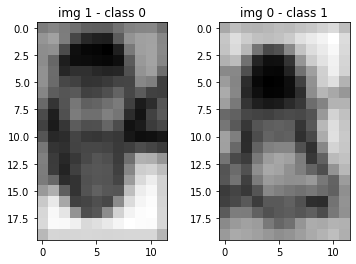

In [9]:
fig, axes = plt.subplots(1,2)

k = np.where(y == 0)[0][0]    # first occurence of class 0
plt.sca(axes[0])
plt.imshow(X[k].reshape(size), cmap="gray")
plt.title('img {} - class {}'.format(k, y[k]))

k = np.where(y == 1)[0][0]    # first occurence of class 1
plt.sca(axes[1])
plt.imshow(X[k].reshape(size), cmap="gray")
plt.title('img {} - class {}'.format(k, y[k]))

### Divide the dataset into training and validation set(s)

In [10]:
# TODO : Use sklearn.model_selection.train_test_split ????????????????


def loadSubSets(X, y, ratio_train, ratio_valid):
    '''
    Function to create a dataset. It will load all the images into a np.array
    
    Parameters:
    
    - X : Vector of all the images of the dataset.
    - y : Corresponding binary label vector. 1 for pollen 0 for non pollen.
    - ratio_train : Desired percentage of dataset dedicated to train phase.
    - ratio_valid : Desired percentage of dataset dedicated to valid phase.
    
    Output:

    X_train : training phase images subset
    y_train : training phase label subset.
    X_valid : validation phase images subset
    y_valid : validation phase label subset.
    X_test  : testing phase images subset
    y_test  : testing phase label subset.
    
    '''
    ratio_test = 1 - ratio_train - ratio_valid
    assert(ratio_test > 0)
    
    Ntot   = X.shape[0]
    Ntrain = int(ratio_train*Ntot)
    Nvalid = int(ratio_valid*Ntot)
    Ntest  = Ntot - Ntrain - Nvalid
    X_train = X[0: Ntrain].copy()
    y_train = y[0: Ntrain].copy()
    X_valid = X[Ntrain: Ntrain+Nvalid].copy()
    y_valid = y[Ntrain: Ntrain+Nvalid].copy()
    X_test  = X[-Ntest:].copy()
    y_test  = y[-Ntest:].copy()
    
    return X_train, y_train, X_valid, y_valid, X_test, y_test

In [11]:
# Example usage of previous function
ratio_train = 0.6
ratio_valid = 0.3


# TODO : Use sklearn.model_selection.train_test_split ????????????????
X_train, y_train, X_valid, y_valid, X_test, y_test = loadSubSets(X, y, ratio_train, ratio_valid)


print("X_train", X_train.shape, " / y_train", y_train.shape)
print("X_valid", X_valid.shape, " / y_valid", y_valid.shape)
print("X_test", X_test.shape,   " / y_test", y_test.shape)

X_train (428, 240)  / y_train (428,)
X_valid (214, 240)  / y_valid (214,)
X_test (72, 240)  / y_test (72,)


## Apply (Gaussian) Naive Bayesian on the training and validation data
### Example without PCA

In [12]:
# TODO: also try sklearn.tree.DecisionTreeClassifier ???

def newClassifier(codename):
    clf = GaussianNB() # default clf
    
    switch = {
        "GAUS" : GaussianNB(),
        "BERN" : BernoulliNB(),
        "CATE" : CategoricalNB(),
        "K-NN" : KNeighborsClassifier(n_neighbors=2, weights='uniform'),
        "SVC"  : SVC(),
        "LSVC" : LinearSVC(),
        "SVR"  : SVR(),
    }

    return switch.get(codename, clf)

In [13]:
# Try other NB manually to select the proper one
# AFTER comparison, GaussianNB have the best results
classifierType = "SVC"

clf = newClassifier(classifierType)
clf.fit(X_train, y_train)

if classifierType == "GAUS":
    mean1, mean2 = clf.theta_    # used later to display "learned parameters"

y_pred = clf.predict(X_valid)

print("Number of mislabeled points ", (y_valid != y_pred).sum(), "/", X_valid.shape[0], " points" )
print("Score : ~{0:.1%}".format(clf.score(X_valid, y_valid)))

Number of mislabeled points  38 / 214  points
Score : ~82.2%


In [14]:
if classifierType == "GAUS":
    # Display "learned parameters"
    f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
    ax1.imshow(mean1.reshape(size), cm.gray)
    ax2.imshow(mean2.reshape(size), cm.gray)
    ax1.title.set_text("Mean of the 0 (?) class")
    ax2.title.set_text("Mean of the 1 (?) class")
    print("0 = non pollen carrying, 1 = pollen carrying, but not sure to which means it correspond..")

### With PCA (testing differents n_comp values)

In [15]:
linear_training_score = []
linear_valid_score = []
bestValidScore = 0

# For differents values of n_components, realize
# a PCA then a supervised learning of the classes
nComp_range = np.arange(1, X.shape[1], 5)  # TODO: change 5 for a more adapted step ?

for nC in nComp_range:
    preProc = PCA(n_components=nC, copy=True)
    preProc.fit(X_train)
    
    X_train_Transformed = preProc.transform(X_train)
    X_valid_Transformed = preProc.transform(X_valid)
    
    # Supervised learning of classes using the choosen model
    clf = newClassifier(classifierType)
    
    # Transform the data according to this learned transformation
    clf.fit(X_train_Transformed, y_train)
    
    # Compute the scores using clf.score()
    trainscore = clf.score(X_train_Transformed, y_train)
    validscore = clf.score(X_valid_Transformed, y_valid)
    
    if classifierType == "GAUS":
        if(validscore > bestValidScore):
            mean1, mean2 = clf.theta_    # store the best mean
    
    linear_training_score.append(trainscore)
    linear_valid_score   .append(validscore)

#### Display test/validation scores graphs according to the PCA comp' number

In [16]:
# TODO: Define gapTol here ?? (see other TODO below)

# We can also imagine a (string ?) parameter that ignore overfitting ("bestscore"), focus on perfect fit ("smallgap") or float (=gapTol)

def plot_trainVSvalid(name, training_score_data, valid_score_data, comp_range, ax):
    '''
    Function to ...................................
    
    Parameters:
    
    - name :                .......................
    - training_score_data : Vector of .............
    - valid_score_data :    Vector of .............
    - comp_range :          .......................
    - ax :                  .......................
    
    Output:

    bestNC  :   ...................................
    bestScore : ...................................
    gap     :   ...................................
    
    '''
    ax.plot(comp_range, training_score_data, label= "train score")
    ax.plot(comp_range, valid_score_data   , label= "valid score")
    ax.set_xlabel("number of components")
    ax.set_ylabel("scores")
    ax.legend()
    ax.set_ylim([0.5,1])

    # Determine best validation set configuration
    bestIndex = np.argmax(valid_score_data)
    bestNC, bestScore = comp_range[bestIndex], valid_score_data[bestIndex]
    # TODO: refined bestIndex "by hand" while gap > gapTol ? (because overfitting isn't taken into account)
    gap = (training_score_data[bestIndex] - valid_score_data[bestIndex])*10
    
    ax.plot(bestNC, valid_score_data[bestIndex], marker='X', color='green')
    ax.set_title("Best score for " + name + " : ~{0:.1%}".format(bestScore)
                 + " obtained with \n" + str(bestNC) + " components (with a {:.2f}".format(gap) + " gap to train)")
    
    return bestNC, bestScore, gap

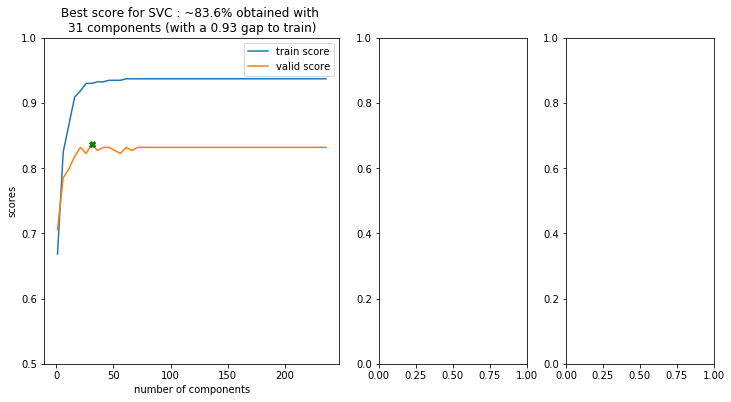

In [17]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6), gridspec_kw={'width_ratios': [10, 5, 5]})

# plot scores depending on the nComp hyper-param
#plt.figure()

bestNC, bestScore, gap = plot_trainVSvalid(classifierType, linear_training_score, linear_valid_score, nComp_range, ax1)

# ax2.imshow(mean1.reshape(size), cm.gray)
# ax3.imshow(mean2.reshape(size), cm.gray)
# ax2.title.set_text("Best mean (class 0 (?))")
# ax3.title.set_text("Best mean (class 1 (?))")

### Adjust SVC parameters

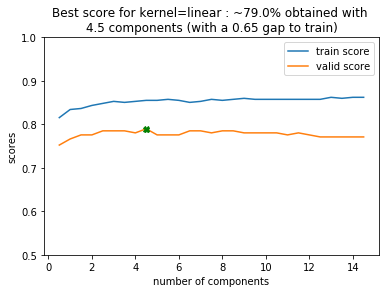

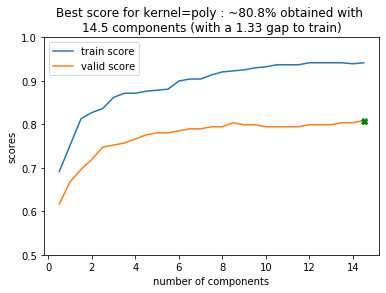

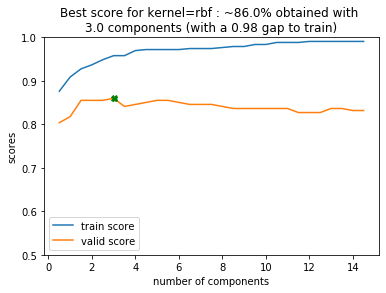

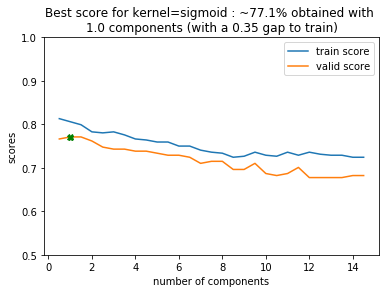

In [18]:
# Set PCA to best nComp computed before
preProc = PCA(n_components=bestNC, copy=True)
preProc.fit(X_train)

X_train_Transformed = preProc.transform(X_train)
X_valid_Transformed = preProc.transform(X_valid)

degree = 2      # Ignored by all kernels except 'poly'
gamma  = 2      # float or 'scale' or 'auto' (kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’)

bestC, bestScore = 0.0, 0.0
gapTol = 1.0    # "If "gapToTrain > 10pts" configuration is considered as overfitting"
cRange = np.arange(0.5, 15, 0.5)  # recall why 15 ??
bestKernel = ""

for kernel in ('linear', 'poly', 'rbf', 'sigmoid'):
    linear_training_score = []
    linear_valid_score = []
    
    # Regularization parameter. The strength of the regularization is inversely proportional to C (highest C = more complex model)
    for C in cRange:
        clf = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)
        clf.fit(X_train_Transformed, y_train)

        linear_training_score.append(clf.score(X_train_Transformed, y_train))
        linear_valid_score   .append(clf.score(X_valid_Transformed, y_valid))
    
    _, ax = plt.subplots()
    newC, newScore, gap = plot_trainVSvalid(("kernel=" + str(kernel)), linear_training_score, linear_valid_score, cRange, ax)
    
    # Compare new score to current bestScore, then replace or not bestC with new C (and best kernel)
    if newScore > bestScore and gapTol > gap > 0:
        bestC = newC
        bestScore = newScore
        bestKernel = kernel

### Cross-validation

Done w/ module https://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

In [19]:
from sklearn.model_selection import cross_validate, KFold, cross_val_score

# Select best SVC parameters (based on ... ? (best % ? smallest overfitting ?))
bestClf = SVC(C=bestC, kernel=bestKernel, degree=degree, gamma=gamma)
bestClf.fit(X_train_Transformed, y_train)

print(classifierType + " params : kernel=" + bestKernel + " C=" + str(bestC))
print("PCA n_components=" + str(bestNC) + "\n")

# TODO: determine/test cv (number of splits)
scores = cross_val_score(bestClf, X_train_Transformed, y_train, cv=5)

print("cross_val different scores :\n", scores)
print("Score mean :", np.mean(scores))

print("\nTraining score :",    bestClf.score(X_train_Transformed, y_train))
print("Validation score : ", bestClf.score(X_valid_Transformed, y_valid))

# TODO: determine/test cv (number of splits)
cross_v = cross_validate(bestClf, X_train_Transformed, y_train, cv=5, return_train_score=True)
print("\ncross_validate infos :\n", cross_v)

SVC params : kernel=rbf C=3.0
PCA n_components=31

cross_val different scores :
 [0.84883721 0.84883721 0.8255814  0.89411765 0.87058824]
Score mean : 0.8575923392612859

Training score : 0.9579439252336449
Validation score :  0.8598130841121495

cross_validate infos :
 {'fit_time': array([0.0069952 , 0.00799489, 0.0079937 , 0.00799441, 0.0069952 ]), 'score_time': array([0.0029974 , 0.00299835, 0.00299954, 0.00199866, 0.00299764]), 'test_score': array([0.84883721, 0.84883721, 0.8255814 , 0.89411765, 0.87058824]), 'train_score': array([0.9619883 , 0.95614035, 0.95614035, 0.95335277, 0.96209913])}


### Confusion matrix

Display meaningful metric that evaluates the quality of the output of our classifier.

#### _TODO : work on "clearer" labels_

Confusion matrix, without normalization
[[25  9]
 [ 0 38]]
Normalized confusion matrix
[[0.74 0.26]
 [0.   1.  ]]


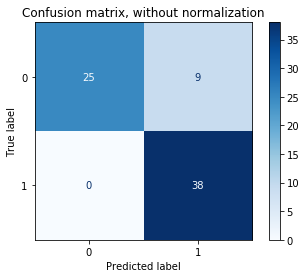

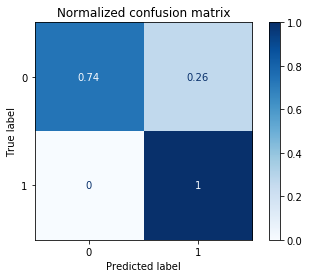

In [20]:
from sklearn.metrics import plot_confusion_matrix # classification_report, confusion_matrix

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(bestClf,
                                 preProc.transform(X_test), y_test, # ON THE TEST SET ? or train or valid ?
                                 display_labels=bestClf.classes_,   # TODO: replace with ["NP", "P"] ???
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

# plt.grid(False) # just estetic I guess but cant see the difference..
plt.show()

### TODO: later

Display Mean Squared Error in loop ?

#### Example :

MSE totale (Mean Squared Error) 0.0001427217979536473


Text(0.5, 1.0, 'The same bee after(?) "binarization"')

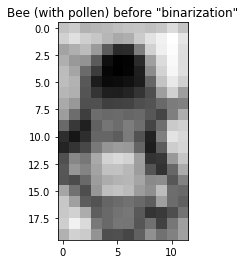

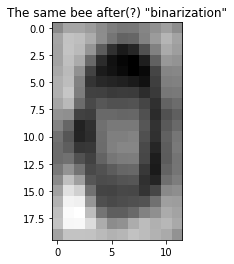

In [21]:
X_train_Transformed = preProc.transform(X_test)

# For an image after "compression" by PCA, calculate the corresponding decompressed image.
# Calculate the decompressed version of the entire train-set.
X_train_Transf_decompressed = preProc.inverse_transform(X_train_Transformed)
diff = X_train_Transf_decompressed - X_test # array of size Nx 64

# Calculate the reconstruction error (root mean square error on the pixels) for that image.
# Calculates the mean square error over the entire train set
totalMeanSquaredError = np.mean(diff**2)
print("MSE totale (Mean Squared Error)", totalMeanSquaredError)


# TODO: Eventually, do this in a function so that we can quickly compare any
#       training example before and after compression/decompression visually.
plt.figure()
n = 60       # choose random image in the dataset
plt.imshow(X_train                    [n].reshape(size), cm.gray)
plt.title("Bee ("+ ("with" if (y[n]==1) else "without") + " pollen) before \"binarization\"")
plt.figure()
plt.imshow(X_train_Transf_decompressed[n].reshape(size), cm.gray)
plt.title("The same bee after(?) \"binarization\"")